# 07 - Basic Probability Concepts

**Probability:** Measures uncertainty on a scale from 0 (impossible) to 1 (certain).

Key rules:
- **Complement Rule:** P(not A) = 1 - P(A)
- **Addition Rule:** P(A or B) = P(A) + P(B) - P(A and B)
- **Multiplication Rule (independent events):** P(A and B) = P(A) × P(B)

**Key Idea:** Without probability, predictions are just guesses. Probability lets us quantify risks and outcomes.

## Simple Example: Coin Flips and Dice

Basic probability with fair coins and dice.

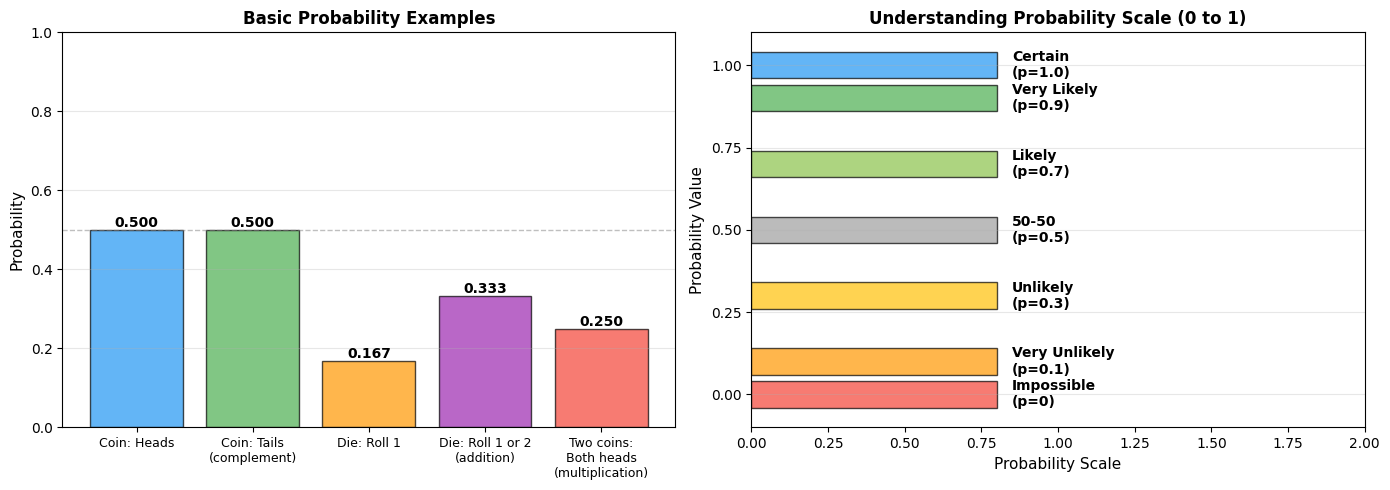


📊 Probability Rules Demonstrated:

1. COMPLEMENT RULE: P(not A) = 1 - P(A)
   → P(Heads) = 0.5, so P(Tails) = 1 - 0.5 = 0.5

2. ADDITION RULE: P(A or B) = P(A) + P(B) [if mutually exclusive]
   → P(Roll 1 or 2) = 1/6 + 1/6 = 2/6 = 0.333

3. MULTIPLICATION RULE: P(A and B) = P(A) × P(B) [if independent]
   → P(Two heads) = 0.5 × 0.5 = 0.25


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Probability examples
examples = {
    'Coin: Heads': 0.5,
    'Coin: Tails\n(complement)': 0.5,
    'Die: Roll 1': 1/6,
    'Die: Roll 1 or 2\n(addition)': 2/6,
    'Two coins:\nBoth heads\n(multiplication)': 0.5 * 0.5
}

# Visualize probabilities
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart of probabilities
colors = ['#2196F3', '#4CAF50', '#FF9800', '#9C27B0', '#F44336']
bars = ax1.bar(range(len(examples)), list(examples.values()), color=colors, alpha=0.7, edgecolor='black')
ax1.set_xticks(range(len(examples)))
ax1.set_xticklabels(list(examples.keys()), fontsize=9)
ax1.set_ylabel('Probability', fontsize=11)
ax1.set_title('Basic Probability Examples', fontsize=12, fontweight='bold')
ax1.set_ylim(0, 1)
ax1.axhline(0.5, color='gray', linestyle='--', alpha=0.5, linewidth=1)
ax1.grid(axis='y', alpha=0.3)

# Add probability values on bars
for bar, val in zip(bars, examples.values()):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{val:.3f}',
            ha='center', va='bottom', fontweight='bold', fontsize=10)

# Probability scale visualization
events = [
    ('Impossible', 0, '#F44336'),
    ('Very Unlikely', 0.1, '#FF9800'),
    ('Unlikely', 0.3, '#FFC107'),
    ('50-50', 0.5, '#9E9E9E'),
    ('Likely', 0.7, '#8BC34A'),
    ('Very Likely', 0.9, '#4CAF50'),
    ('Certain', 1.0, '#2196F3')
]

for event, prob, color in events:
    ax2.barh(prob, 0.8, height=0.08, color=color, alpha=0.7, edgecolor='black')
    ax2.text(0.85, prob, f'{event}\n(p={prob})', va='center', fontsize=10, fontweight='bold')

ax2.set_xlim(0, 2)
ax2.set_ylim(-0.1, 1.1)
ax2.set_xlabel('Probability Scale', fontsize=11)
ax2.set_ylabel('Probability Value', fontsize=11)
ax2.set_title('Understanding Probability Scale (0 to 1)', fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
ax2.set_yticks([0, 0.25, 0.5, 0.75, 1.0])

plt.tight_layout()
plt.show()

print("\n📊 Probability Rules Demonstrated:")
print("\n1. COMPLEMENT RULE: P(not A) = 1 - P(A)")
print("   → P(Heads) = 0.5, so P(Tails) = 1 - 0.5 = 0.5")

print("\n2. ADDITION RULE: P(A or B) = P(A) + P(B) [if mutually exclusive]")
print("   → P(Roll 1 or 2) = 1/6 + 1/6 = 2/6 = 0.333")

print("\n3. MULTIPLICATION RULE: P(A and B) = P(A) × P(B) [if independent]")
print("   → P(Two heads) = 0.5 × 0.5 = 0.25")

## Real-World Example: E-Commerce Conversion Probability

A store tracks visitor behavior: 30% buy shoes. What are the probabilities of different outcomes?

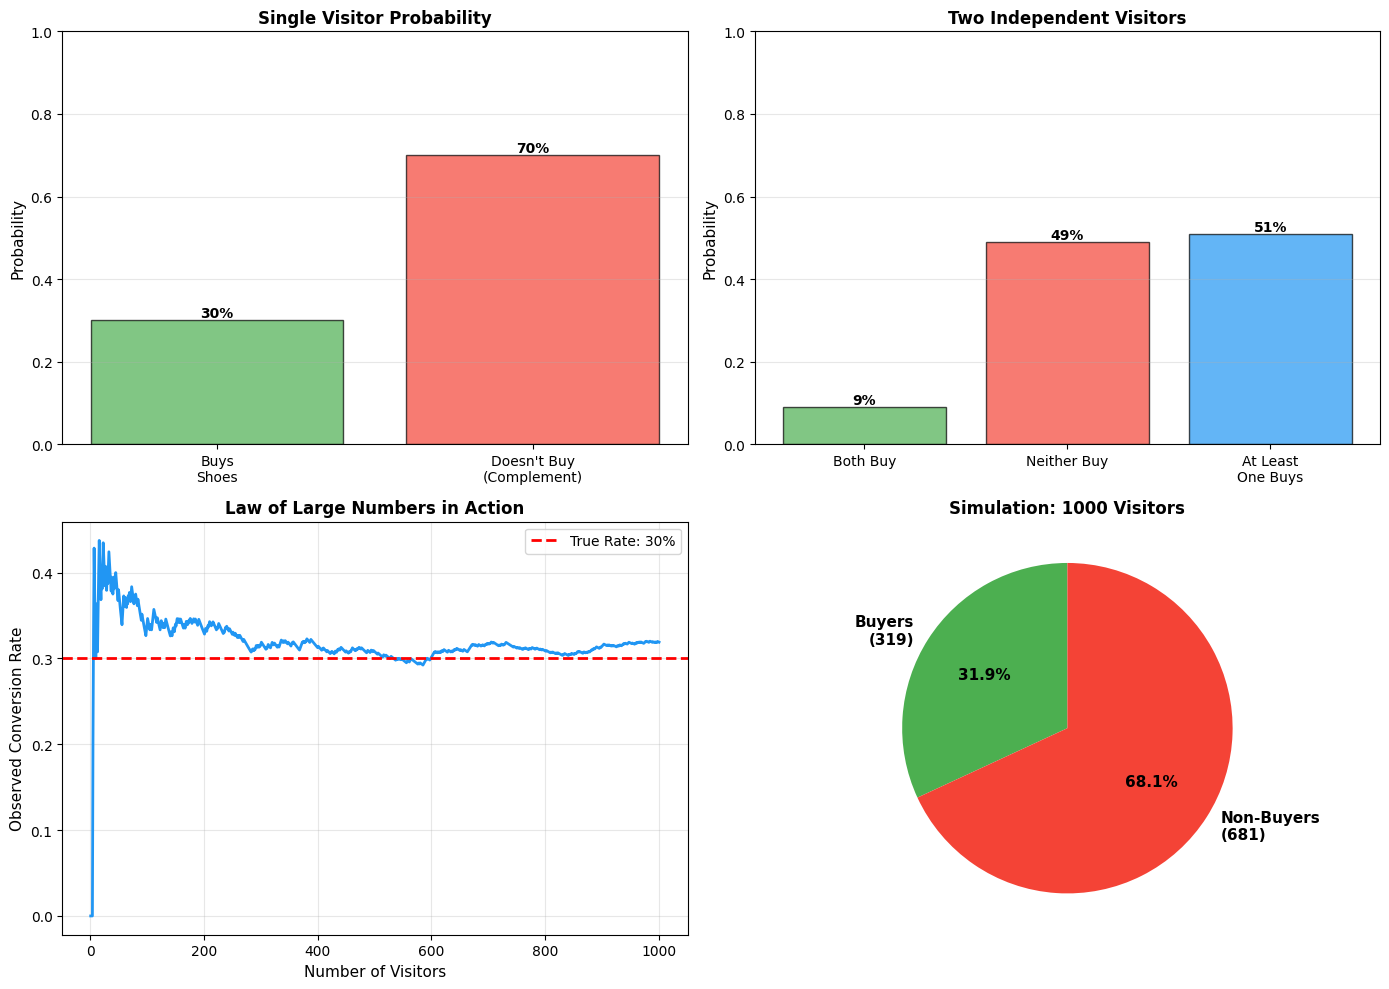


📊 E-Commerce Probability Analysis:

1. Single visitor probability: 30% buy shoes
   → Complement: 70% don't buy

2. Two independent visitors:
   → Both buy: 9.0% (multiplication: 0.3 × 0.3)
   → Neither buys: 49.0% (multiplication: 0.7 × 0.7)
   → At least one buys: 51.0% (complement of neither)

3. Simulation of 1000 visitors:
   → Expected buyers: 300
   → Actual buyers: 319
   → Simulated rate: 31.9%
   → Close to theory! (Law of Large Numbers)

💡 Business Application:
   → Predict daily sales: 1000 visitors × 30% = ~300 orders
   → Inventory planning: Stock enough for expected demand
   → Marketing ROI: Calculate expected revenue from campaigns


In [2]:
# Store probabilities
p_buy_shoes = 0.30
p_no_buy_shoes = 1 - p_buy_shoes  # Complement rule

# For 2 independent visitors
p_both_buy = p_buy_shoes * p_buy_shoes  # Multiplication rule
p_neither_buy = p_no_buy_shoes * p_no_buy_shoes
p_at_least_one_buys = 1 - p_neither_buy  # Complement rule

# Simulate 1000 visitors
np.random.seed(42)
n_visitors = 1000
purchases = np.random.choice([1, 0], size=n_visitors, p=[p_buy_shoes, p_no_buy_shoes])

simulated_conversion = np.sum(purchases) / n_visitors

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Single visitor probabilities
ax1 = axes[0, 0]
ax1.bar(['Buys\nShoes', 'Doesn\'t Buy\n(Complement)'], 
           [p_buy_shoes, p_no_buy_shoes],
           color=['#4CAF50', '#F44336'], alpha=0.7, edgecolor='black')
ax1.set_ylabel('Probability', fontsize=11)
ax1.set_title('Single Visitor Probability', fontsize=12, fontweight='bold')
ax1.set_ylim(0, 1)
ax1.grid(axis='y', alpha=0.3)
for i, val in enumerate([p_buy_shoes, p_no_buy_shoes]):
    ax1.text(i, val, f'{val:.0%}', ha='center', va='bottom', fontweight='bold')

# Two visitors probabilities
ax2 = axes[0, 1]
two_visitor_scenarios = {
    'Both Buy': p_both_buy,
    'Neither Buy': p_neither_buy,
    'At Least\nOne Buys': p_at_least_one_buys
}
ax2.bar(range(len(two_visitor_scenarios)), list(two_visitor_scenarios.values()),
       color=['#4CAF50', '#F44336', '#2196F3'], alpha=0.7, edgecolor='black')
ax2.set_xticks(range(len(two_visitor_scenarios)))
ax2.set_xticklabels(list(two_visitor_scenarios.keys()))
ax2.set_ylabel('Probability', fontsize=11)
ax2.set_title('Two Independent Visitors', fontsize=12, fontweight='bold')
ax2.set_ylim(0, 1)
ax2.grid(axis='y', alpha=0.3)
for i, val in enumerate(two_visitor_scenarios.values()):
    ax2.text(i, val, f'{val:.0%}', ha='center', va='bottom', fontweight='bold')

# Simulation results
ax3 = axes[1, 0]
cumulative_buyers = np.cumsum(purchases)
cumulative_rate = cumulative_buyers / np.arange(1, n_visitors + 1)
ax3.plot(range(1, n_visitors + 1), cumulative_rate, color='#2196F3', linewidth=2)
ax3.axhline(p_buy_shoes, color='red', linestyle='--', linewidth=2, label=f'True Rate: {p_buy_shoes:.0%}')
ax3.set_xlabel('Number of Visitors', fontsize=11)
ax3.set_ylabel('Observed Conversion Rate', fontsize=11)
ax3.set_title('Law of Large Numbers in Action', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(alpha=0.3)

# Pie chart of outcomes
ax4 = axes[1, 1]
actual_buyers = np.sum(purchases)
actual_non_buyers = n_visitors - actual_buyers
ax4.pie([actual_buyers, actual_non_buyers], 
       labels=[f'Buyers\n({actual_buyers})', f'Non-Buyers\n({actual_non_buyers})'],
       colors=['#4CAF50', '#F44336'], autopct='%1.1f%%', startangle=90,
       textprops={'fontsize': 11, 'fontweight': 'bold'})
ax4.set_title(f'Simulation: {n_visitors} Visitors', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📊 E-Commerce Probability Analysis:")
print(f"\n1. Single visitor probability: {p_buy_shoes:.0%} buy shoes")
print(f"   → Complement: {p_no_buy_shoes:.0%} don't buy")

print(f"\n2. Two independent visitors:")
print(f"   → Both buy: {p_both_buy:.1%} (multiplication: 0.3 × 0.3)")
print(f"   → Neither buys: {p_neither_buy:.1%} (multiplication: 0.7 × 0.7)")
print(f"   → At least one buys: {p_at_least_one_buys:.1%} (complement of neither)")

print(f"\n3. Simulation of {n_visitors} visitors:")
print(f"   → Expected buyers: {p_buy_shoes * n_visitors:.0f}")
print(f"   → Actual buyers: {actual_buyers}")
print(f"   → Simulated rate: {simulated_conversion:.1%}")
print(f"   → Close to theory! (Law of Large Numbers)")

print("\n💡 Business Application:")
print("   → Predict daily sales: 1000 visitors × 30% = ~300 orders")
print("   → Inventory planning: Stock enough for expected demand")
print("   → Marketing ROI: Calculate expected revenue from campaigns")

## Summary: Probability Rules in Action

### Core Rules

| Rule | Formula | Example |
|------|---------|----------|
| **Complement** | P(not A) = 1 - P(A) | If 30% buy, then 70% don't |
| **Addition** | P(A or B) = P(A) + P(B) | P(roll 1 or 2) = 1/6 + 1/6 |
| **Multiplication** | P(A and B) = P(A) × P(B) | P(two heads) = 0.5 × 0.5 |

### Key Concepts
- **Range:** Probabilities are always between 0 and 1
- **Independence:** Events don't affect each other (coin flips, different customers)
- **Law of Large Numbers:** More trials → observed rate gets closer to true probability

### Real-World Uses
- **Sales forecasting:** Predict revenue from conversion rates
- **Inventory management:** Stock levels based on purchase probability
- **Risk assessment:** Quantify likelihood of different outcomes
- **A/B testing:** Compare probabilities of success between versions

**Remember:** Probability turns uncertainty into numbers we can work with!